In [12]:
from utils import data_generator
from tcn import compiled_tcn
from keras.models import Sequential
from keras.layers import Dense
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

def generate_data():
    (x_train, y_train), (x_test, y_test) = data_generator()
    
    print(f'x_train.shape = {x_train.shape}')
    print(f'y_train.shape = {y_train.shape}')
    print(f'x_test.shape = {x_test.shape}')
    print(f'y_test.shape = {y_test.shape}')

    return x_train, y_train, x_test, y_test

def build_model(max_len):
    model = compiled_tcn(return_sequences=False,
                         num_feat=1,
                         num_classes=10,
                         nb_filters=20,
                         kernel_size=6,
                         dilations=[2 ** i for i in range(9)],
                         nb_stacks=1,
                         max_len=max_len,
                         use_skip_connections=True)


    return model


 #def train(model, x_train, y_train, x_test, y_test): model.fit(x_train, y_train.squeeze().argmax(axis=1), epochs=10, validation_data=(x_test, y_test.squeeze().argmax(axis=1))) return model

In [13]:
x_train, y_train, x_test, y_test = generate_data()
model = build_model(max_len=x_train[0:1].shape[1])

x_train.shape = (60000, 784, 1)
y_train.shape = (60000, 10, 1)
x_test.shape = (10000, 784, 1)
y_test.shape = (10000, 10, 1)
x.shape= (?, 20)
model.x = (?, 784, 1)
model.y = (?, 10)


In [14]:
#es = EarlyStopping(monitor='val_accuracy', mode='max', min_delta=1)
hist= model.fit(x_train, y_train.squeeze().argmax(axis=1), epochs=100,validation_data=(x_test, y_test.squeeze().argmax(axis=1)))
#history = model.fit(x_train,  y_train.squeeze().argmax(axis=1), validation_data=(x_test, y_test.squeeze().argmax(axis=1)), epochs=100, verbose=0, callbacks=[es])


Train on 60000 samples, validate on 10000 samples
Epoch 1/100
60000/60000 [==============================] - 85s 1ms/step - loss: 0.3778 - accuracy: 0.8907 - val_loss: 0.1323 - val_accuracy: 0.9578
Epoch 2/100
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1732 - accuracy: 0.9516 - val_loss: 0.1100 - val_accuracy: 0.9674
Epoch 3/100
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1444 - accuracy: 0.9590 - val_loss: 0.0931 - val_accuracy: 0.9722
Epoch 4/100
60000/60000 [==============================] - 81s 1ms/step - loss: 0.1317 - accuracy: 0.9630 - val_loss: 0.0952 - val_accuracy: 0.9732
Epoch 5/100
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1227 - accuracy: 0.9653 - val_loss: 0.0888 - val_accuracy: 0.9734
Epoch 6/100
60000/60000 [==============================] - 82s 1ms/step - loss: 0.1171 - accuracy: 0.9673 - val_loss: 0.0774 - val_accuracy: 0.9779
Epoch 7/100
60000/60000 [==============================] - 81s

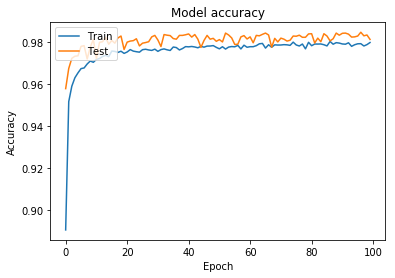

In [21]:
import matplotlib.pyplot as plt
# Plot training & validation accuracy values
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


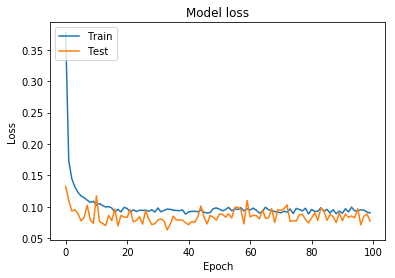

In [22]:
# Plot training & validation loss values
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [23]:
model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 784, 1)       0                                            
__________________________________________________________________________________________________
conv1d_85 (Conv1D)              (None, 784, 20)      40          input_4[0][0]                    
__________________________________________________________________________________________________
conv1d_86 (Conv1D)              (None, 784, 20)      2420        conv1d_85[0][0]                  
__________________________________________________________________________________________________
activation_85 (Activation)      (None, 784, 20)      0           conv1d_86[0][0]                  
__________________________________________________________________________________________________
spatial_dr